In [1]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plots
from mpl_toolkits.mplot3d import Axes3D
plots.style.use('fivethirtyeight')
%matplotlib inline

# Classification Examples: Medicine



In [2]:
ckd = Table.read_table('ckd.csv').relabeled('Blood Glucose Random', 'Glucose')
ckd.show(3)

Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Glucose,Blood Urea,Serum Creatinine,Sodium,Potassium,Hemoglobin,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,1
53,90,1.02,2,0,abnormal,abnormal,present,notpresent,70,107,7.2,114,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,1
63,70,1.01,3,0,abnormal,abnormal,present,notpresent,380,60,2.7,131,4.2,10.8,32,4500,3.8,yes,yes,no,poor,yes,no,1


# Rows in Tables

In [3]:
ckd

Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Glucose,Blood Urea,Serum Creatinine,Sodium,Potassium,Hemoglobin,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,1
53,90,1.02,2,0,abnormal,abnormal,present,notpresent,70,107,7.2,114,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,1
63,70,1.01,3,0,abnormal,abnormal,present,notpresent,380,60,2.7,131,4.2,10.8,32,4500,3.8,yes,yes,no,poor,yes,no,1
68,80,1.01,3,2,normal,abnormal,present,present,157,90,4.1,130,6.4,5.6,16,11000,2.6,yes,yes,yes,poor,yes,no,1
61,80,1.015,2,0,abnormal,abnormal,notpresent,notpresent,173,148,3.9,135,5.2,7.7,24,9200,3.2,yes,yes,yes,poor,yes,yes,1
48,80,1.025,4,0,normal,abnormal,notpresent,notpresent,95,163,7.7,136,3.8,9.8,32,6900,3.4,yes,no,no,good,no,yes,1
69,70,1.01,3,4,normal,abnormal,notpresent,notpresent,264,87,2.7,130,4,12.5,37,9600,4.1,yes,yes,yes,good,yes,no,1
73,70,1.005,0,0,normal,normal,notpresent,notpresent,70,32,0.9,125,4,10,29,18900,3.5,yes,yes,no,good,yes,no,1
73,80,1.02,2,0,abnormal,abnormal,notpresent,notpresent,253,142,4.6,138,5.8,10.5,33,7200,4.3,yes,yes,yes,good,no,no,1
46,60,1.01,1,0,normal,normal,notpresent,notpresent,163,92,3.3,141,4,9.8,28,14600,3.2,yes,yes,no,good,no,no,1


In [9]:
# Find the blood urea count of the 10th patient

ckd.row(9).item("Blood Urea"), ckd.row(9).item(10)

(92, 92)

In [11]:
np.array(ckd.row(10)) #.item("Blood Pressure")

array(['56', '90', '1.015', '2', '0', 'abnormal', 'abnormal',
       'notpresent', 'notpresent', '129', '107', '6.7', '131', '4.8',
       '9.1', '29', '6400', '3.4', 'yes', 'no', 'no', 'good', 'no', 'no',
       '1'], dtype='<U32')

In [15]:
type(np.array(ckd.row(10)).item(0))

str

In [12]:
ckd.row(10)

Row(Age=56, Blood Pressure=90, Specific Gravity=1.015, Albumin=2, Sugar=0, Red Blood Cells='abnormal', Pus Cell='abnormal', Pus Cell clumps='notpresent', Bacteria='notpresent', Glucose=129, Blood Urea=107, Serum Creatinine=6.7, Sodium=131, Potassium=4.8, Hemoglobin=9.1, Packed Cell Volume=29, White Blood Cell Count=6400, Red Blood Cell Count=3.4, Hypertension='yes', Diabetes Mellitus='no', Coronary Artery Disease='no', Appetite='good', Pedal Edema='no', Anemia='no', Class=1)

In [17]:
# Number of people who have hypertension and have a high blood pressure
ckd.item(0)

/home/jupyter-apoliak@barnard.ed-b8a88/.local/lib/python3.7/site-packages/datascience/tables.py:222: FutureWarning: Implicit column method lookup is deprecated.
  warnings.warn("Implicit column method lookup is deprecated.", FutureWarning)


Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Glucose,Blood Urea,Serum Creatinine,Sodium,Potassium,Hemoglobin,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,1


In [19]:
ckd.row(0).item('Age')

48

In [24]:
ckd.item(0).column('Age').item(0)

/home/jupyter-apoliak@barnard.ed-b8a88/.local/lib/python3.7/site-packages/datascience/tables.py:222: FutureWarning: Implicit column method lookup is deprecated.
  warnings.warn("Implicit column method lookup is deprecated.", FutureWarning)


48

In [27]:
# Number of people who have hypertension and have a high blood pressure
num_of_candidates = 0
for current_row in ckd.rows:
    if current_row.item('Hypertension') == 'yes':
        if current_row.item('Blood Pressure') > 90:
            num_of_candidates = num_of_candidates + 1
num_of_candidates

8

In [34]:
ckd.with_columns('High Blood Pressure', 
                 ckd.column('Blood Pressure') > 90) \
                    .where('High Blood Pressure', True) \
                    .where('Hypertension', 'yes').num_rows

8

In [35]:
ckd.with_columns('High Blood Pressure', 
                 ckd.column('Blood Pressure') > 90) \
                    .where('High Blood Pressure', True) 

Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Glucose,Blood Urea,Serum Creatinine,Sodium,Potassium,Hemoglobin,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class,High Blood Pressure
63,100,1.01,2,2,normal,normal,notpresent,present,280,35,3.2,143,3.5,13,40,9800,4.2,yes,no,yes,good,no,no,1,True
73,100,1.01,3,2,abnormal,abnormal,present,notpresent,295,90,5.6,140,2.9,9.2,30,7000,3.2,yes,yes,yes,poor,no,no,1,True
70,100,1.015,4,0,normal,normal,notpresent,notpresent,118,125,5.3,136,4.9,12,37,8400,8,yes,no,no,good,no,no,1,True
49,100,1.01,3,0,abnormal,abnormal,notpresent,notpresent,129,158,11.8,122,3.2,8.1,24,9600,3.5,yes,yes,no,poor,yes,yes,1,True
59,100,1.02,4,2,normal,normal,notpresent,notpresent,252,40,3.2,137,4.7,11.2,30,26400,3.9,yes,yes,no,poor,yes,no,1,True
59,100,1.015,4,2,normal,normal,notpresent,notpresent,255,132,12.8,135,5.7,7.3,20,9800,3.9,yes,yes,yes,good,no,yes,1,True
64,100,1.015,4,2,abnormal,abnormal,notpresent,present,163,54,7.2,140,4.6,7.9,26,7500,3.4,yes,yes,no,good,yes,no,1,True
48,110,1.015,3,0,abnormal,normal,present,notpresent,106,215,15.2,120,5.7,8.6,26,5000,2.5,yes,no,yes,good,no,yes,1,True


# Defining a Classifier

In [28]:
patients = Table.read_table('breast-cancer.csv').drop('ID')
patients.show(5)

Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
5,1,1,1,2,1,3,1,1,0
5,4,4,5,7,10,3,2,1,0
3,1,1,1,2,2,3,1,1,0
6,8,8,1,3,4,3,7,1,0
4,1,1,3,2,1,3,1,1,0


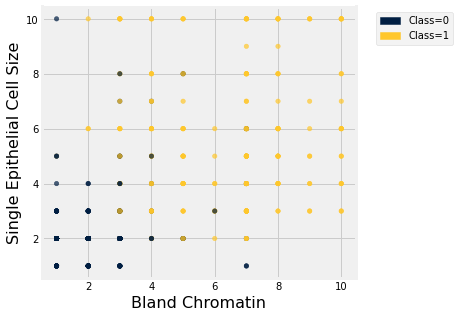

In [29]:

patients.scatter('Bland Chromatin', 'Single Epithelial Cell Size', group='Class')

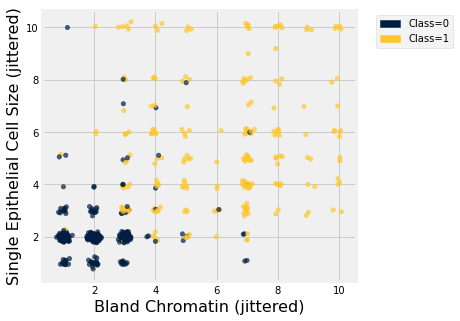

In [30]:
def randomize_column(a):
    return a + np.random.normal(0.0, 0.09, size=len(a))

jittered = Table().with_columns([
        'Bland Chromatin (jittered)', 
        randomize_column(patients.column('Bland Chromatin')),
        'Single Epithelial Cell Size (jittered)', 
        randomize_column(patients.column('Single Epithelial Cell Size')),
        'Class',
        patients.column('Class')
    ])

jittered.scatter('Bland Chromatin (jittered)', 'Single Epithelial Cell Size (jittered)', group='Class')

# Distance

In [ ]:
Table().with_columns(['X', [0, 2, 3], 'Y', [0, 2, 4]]).scatter('X', 'Y')

In [ ]:
def distance(pt1, pt2):
    """Return the distance between two points (represented as arrays)"""
    return np.sqrt(np.sum((pt1 - pt2) ** 2))

def row_distance(row1, row2):
    """Return the distance between two numerical rows of a table"""
    return distance(make_array(row1), make_array(row2))

In [ ]:
attributes = patients.drop('Class')
attributes.show(3)

In [ ]:
row_distance(attributes.row(0), attributes.row(1))

In [ ]:
row_distance(attributes.row(0), attributes.row(2))

In [ ]:
row_distance(attributes.row(0), attributes.row(0))

# Classification Procedure

In [ ]:
def distances(training, example):
    """Compute a table with the training set and distances to the example for each row in the training set."""
    dists = []
    attributes = training.drop('Class')
    for row in attributes.rows:
        dist = row_distance(row, example)
        dists.append(dist)
    return training.with_column('Distance', dists)

In [ ]:
def closest(training, example, k):
    """Return a table of the k closest neighbors to example"""
    return distances(training, example).sort('Distance').take(np.arange(k))

In [ ]:
patients.take(12)

In [ ]:
example = patients.drop('Class').row(12)
example

In [ ]:
closest(patients, example, 5)

In [ ]:

closest(patients.exclude(12), example, 5)

In [ ]:
def majority_class(neighbors):
    """Return the class that's most common among all these neighbors."""
    return neighbors.group('Class').sort('count', descending=True).column('Class').item(0)

In [ ]:
def classify(training, example, k):
    "Return the majority class among the k nearest neighbors."
    nearest_neighbors = closest(training, example, k)
    return majority_class(nearest_neighbors)

In [ ]:
classify(patients.exclude(12), example, 5)

In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook()
grader.export("Lecture_24_completed.ipynb", pdf=False)